In [1]:
# Unsupervised Learning

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Path
data_dict_path='testedtitanic.csv'

In [3]:
# Read the CSV files
titanic_df=pd.read_csv(data_dict_path)

In [4]:
columns_to_drop=['PassengerId', 'Name', 'Sex1', 'Age1','Fare1', 'Ticket', 'Cabin', 'Embarked1', 'Parch', 'Survived' ]

In [5]:
titanic_df=titanic_df.drop(columns_to_drop, axis=1)

In [6]:
#  To know the statistics are
titanic_df.describe()

,Pclass,Sex,Age,SibSp,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,1.105263,0.447368,0.191388,1.464115
std,0.841838,0.481622,1.007607,0.896760,0.690270,0.685516
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,2.000000,1.000000,0.000000,2.000000
max,3.000000,1.000000,3.000000,8.000000,3.000000,3.000000


<Axes: >

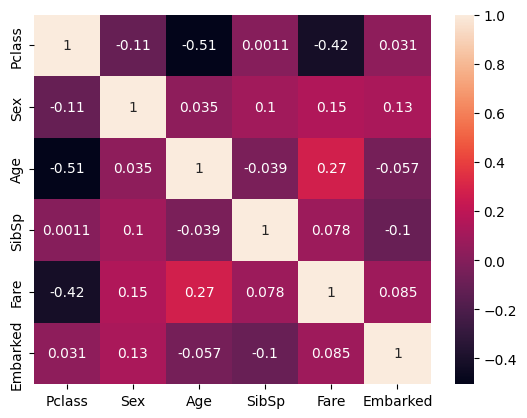

In [7]:
#  Correlation matrix
corr_matrix=titanic_df.corr()
sns.heatmap(corr_matrix, annot=True)
# titanic_df.info()

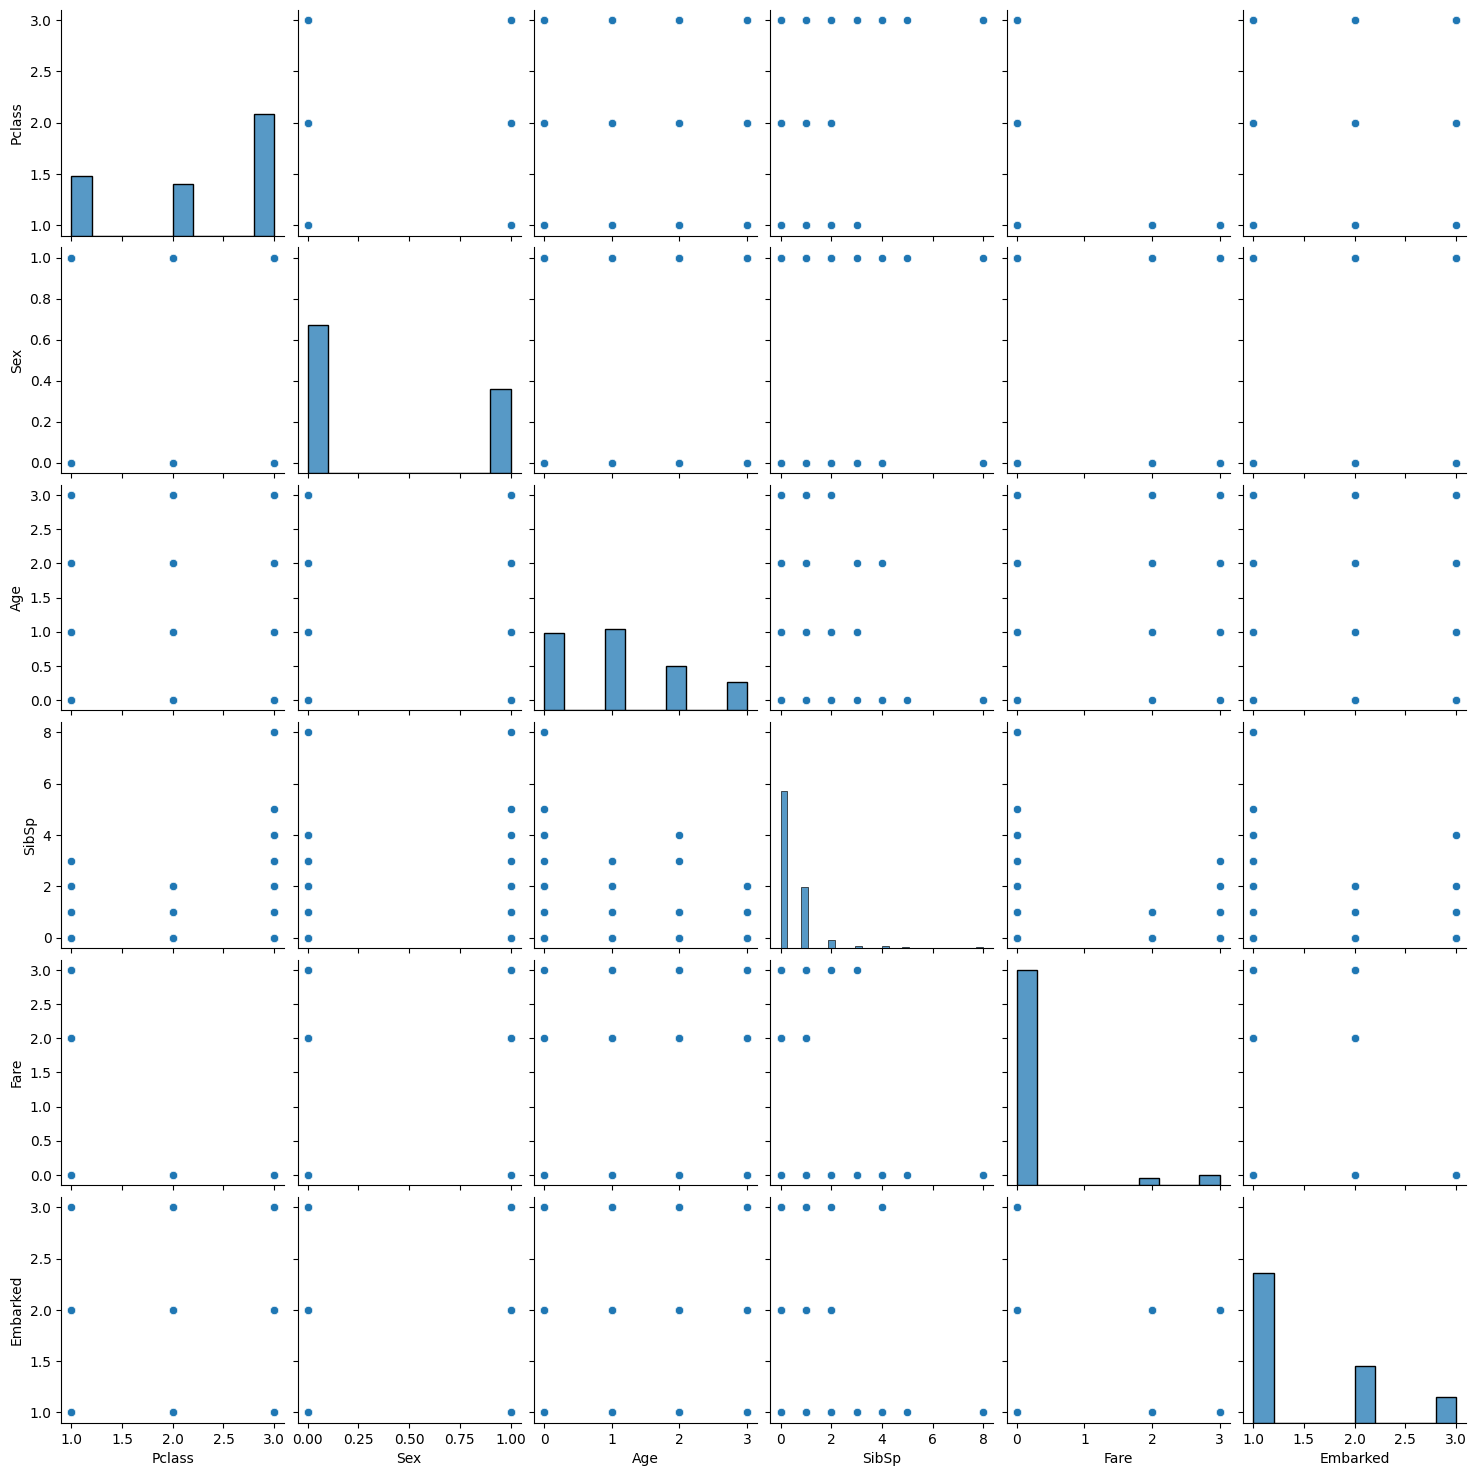

In [8]:
#  Plotting against each other
sns.pairplot(titanic_df)


In [9]:
#  Scaling data
scaling=StandardScaler()
scaled=scaling.fit_transform(titanic_df)

In [10]:
scaled_df=pd.DataFrame(scaled, columns=titanic_df.columns)

# Print scaled dataset
scaled_df.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0.873482,-0.755929,0.889046,-0.499470,-0.277597,2.243165
1,0.873482,1.322876,1.882686,0.616992,-0.277597,-0.677841
2,-0.315819,-0.755929,1.882686,-0.499470,-0.277597,2.243165
3,0.873482,-0.755929,-0.104594,-0.499470,-0.277597,-0.677841
4,0.873482,1.322876,-0.104594,0.616992,-0.277597,-0.677841


<Axes: >

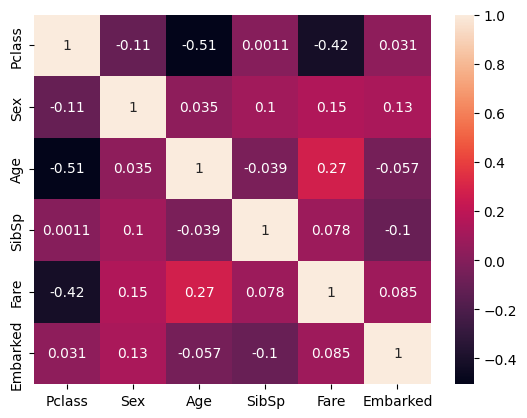

In [11]:
#  Correlation matrix for the scaled data

corr_matrix=scaled_df.corr()
sns.heatmap(corr_matrix, annot=True)

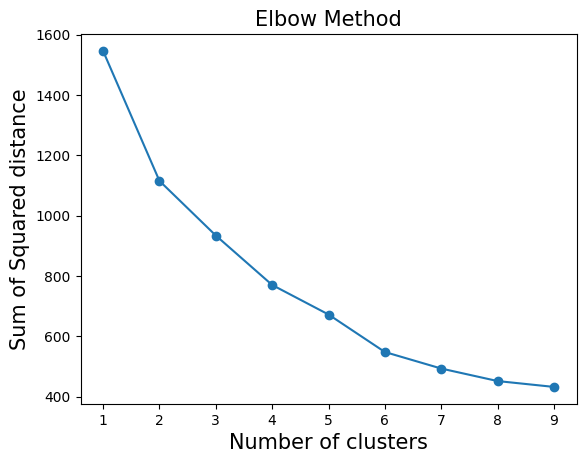

In [12]:
# Plotting the elbow curve

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i,  n_init=10)
    kmean.fit(titanic_df)
    a.append(kmean.inertia_)

plt.plot(K,a,marker='o')
plt.title('Elbow Method', fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance', fontsize=15)
plt.show()

In [13]:
# Choosing no. of clusters as 2 and refitting kmeans models

kmeans=KMeans(n_clusters=2, random_state=111, n_init=10)
kmeans.fit(scaled_df)

KMeans(n_clusters=2, n_init=10, random_state=111)

In [14]:
KMeans(n_clusters=2, random_state=111)

KMeans(n_clusters=2, random_state=111)

In [15]:
# Counting number of records in every cluster

pd.Series(kmeans.labels_).value_counts()

0    309
1    109
Name: count, dtype: int64

In [16]:
# Calculating how good my model is
# Calculate Silhouette Coefficient

metrics.silhouette_score(scaled_df, kmeans.labels_)

0.29114366727474617

In [17]:
#  Predicting values

cluster_labels=kmeans.fit_predict(scaled_df)

In [18]:
preds=kmeans.labels_
kmeans_df=pd.DataFrame(titanic_df)
kmeans_df['KMeans_Clusters']=preds
kmeans_df.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked,KMeans_Clusters
0,3,0,2,0,0,3,0
1,3,1,3,1,0,1,0
2,2,0,3,0,0,3,1
3,3,0,1,0,0,1,0
4,3,1,1,1,0,1,0


In [19]:
# Save the kmeans file
kmeans_df.to_csv('kmeans_result_csv',index=False)

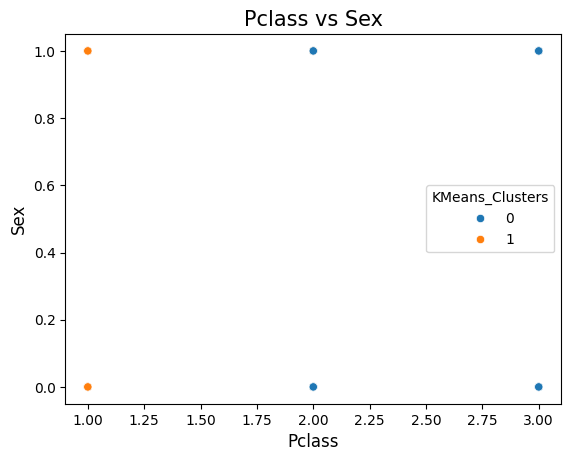

In [20]:
#  Visualizations of clusters

# sns.scatterplot(kmeans_df['Pclass'], kmeans_df['Sex'], 
#                 hue='KMeans_Clusters',titanic_df=kmeans_df)
sns.scatterplot(data=kmeans_df, x='Pclass', y='Sex', hue='KMeans_Clusters')
plt.title("Pclass vs Sex", fontsize=15)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Sex', fontsize=12)
plt.show()       